In [100]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot') # Look Pretty
from pandas.tools.plotting import parallel_coordinates,andrews_curves
%matplotlib notebook
import assignment2_helper as helper

In [102]:
# Kidney data 
df = pd.read_csv('Datasets/kidney_disease.csv')
df.dropna(inplace= True)

In [41]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [28]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [29]:
labels[:10]

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

In [30]:
df = df[['bgr','wc','rc']]
df.shape
df.bgr = pd.to_numeric(df.bgr , errors='coerce')
df.wc = pd.to_numeric(df.wc , errors='coerce')
df.rc = pd.to_numeric(df.rc , errors='coerce')

In [31]:
df.describe()

,bgr,wc,rc
count,158.000000,158.000000,158.000000
mean,131.341772,8475.949367,4.891772
std,64.939832,3126.880181,1.019364
min,70.000000,3800.000000,2.100000
25%,97.000000,6525.000000,4.500000
50%,115.500000,7800.000000,4.950000
75%,131.750000,9775.000000,5.600000
max,490.000000,26400.000000,8.000000


<IPython.core.display.Javascript object>


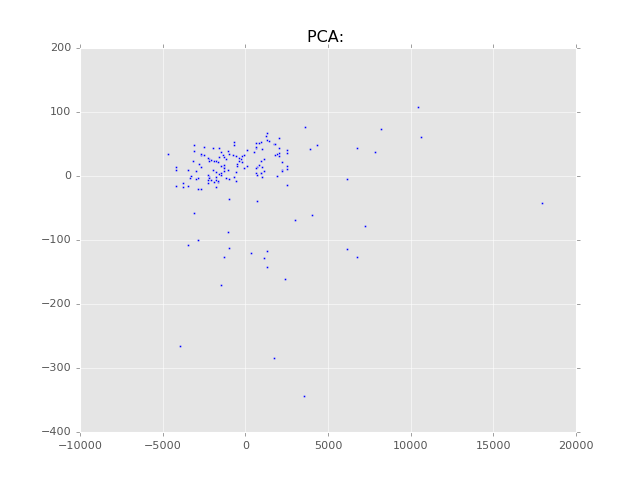

In [16]:
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('PCA: ')
ax.scatter(T[:,0], T[:,1], c='blue', marker='.', alpha=1)

<IPython.core.display.Javascript object>


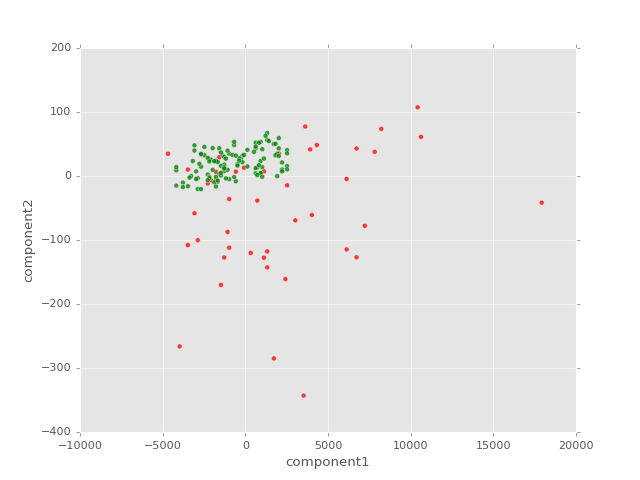

In [17]:
scaleFeatures = False
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [18]:
scaleFeatures = True
df=helper.scaleFeatures(df)

New Variances:
 bgr    1.006369
wc     1.006369
rc     1.006369
dtype: float64
New Describe:
                 bgr            wc            rc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  9.345548e-17  1.068063e-16
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -1.500159e+00 -2.747446e+00
25%   -5.305059e-01 -6.259123e-01 -3.855519e-01
50%   -2.447210e-01 -2.168611e-01  5.730335e-02
75%    6.306235e-03  4.167672e-01  6.969831e-01
max    5.540492e+00  5.750474e+00  3.058878e+00


In [19]:
df.describe()

,bgr,wc,rc
count,1.580000e+02,1.580000e+02,1.580000e+02
mean,-9.755075e-17,9.345548e-17,1.068063e-16
std,1.003180e+00,1.003180e+00,1.003180e+00
min,-9.475974e-01,-1.500159e+00,-2.747446e+00
25%,-5.305059e-01,-6.259123e-01,-3.855519e-01
50%,-2.447210e-01,-2.168611e-01,5.730335e-02
75%,6.306235e-03,4.167672e-01,6.969831e-01
max,5.540492e+00,5.750474e+00,3.058878e+00


In [20]:
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)

Features by importance:
 [(3.9998071556884853, 'wc'), (3.2588876641210898, 'bgr'), (3.0097527529983648, 'rc')]


<IPython.core.display.Javascript object>


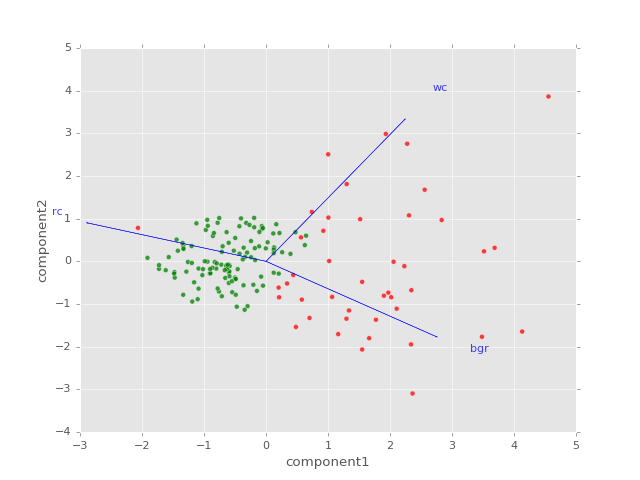

In [21]:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [44]:
# Kidney data 
# assignment 3
df = pd.read_csv('Datasets/kidney_disease.csv')
df.dropna(inplace= True)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [45]:
nominal_feautures = ['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
df.drop(nominal_feautures, axis=1, inplace=True, errors='ignore')

In [46]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2


In [47]:
df.pcv = pd.to_numeric(df.pcv , errors='coerce')
df.wc = pd.to_numeric(df.wc , errors='coerce')
df.rc = pd.to_numeric(df.rc , errors='coerce')

In [48]:
df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv       int64
wc        int64
rc      float64
dtype: object

In [49]:
scaleFeatures = True
df=helper.scaleFeatures(df)

New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
pcv     1.006369
wc      1.006369
rc      1.006369
dtype: float64
New Describe:
                 age            bp            sg            al            su  \
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02   
mean   1.032929e-16  7.406171e-16 -1.624580e-15 -7.757508e-16 -2.108018e-18   
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00   
min   -2.817246e+00 -2.158952e+00 -2.713365e+00 -5.661221e-01 -3.122333e-01   
25%   -6.669624e-01 -1.261282e+00  2.309247e-02 -5.661221e-01 -3.122333e-01   
50%    6.057713e-02  5.340564e-01  2.309247e-02 -5.661221e-01 -3.122333e-01   
75%    6.749439e-01  5.340564e-01  9.352451e-01  1.437770e-01 -3.122333e-01   
max    2.162358e+00  3.227064e+00  9.352451e-01  2.273474e+00  5.854375e+00   

    

In [50]:
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)

Features by importance:
 [(3.1043226043144556, 'sc'), (3.0682213474348896, 'bgr'), (3.062073035813364, 'pcv'), (3.0492691739727484, 'hemo'), (3.0492140350096473, 'bu'), (3.0023259564150524, 'al'), (2.8099250501516364, 'su'), (2.769784621968723, 'sg'), (2.7284826695249977, 'rc'), (2.367022692650247, 'sod'), (1.9510689015492941, 'age'), (1.8925913482908892, 'wc'), (1.598405901793557, 'bp'), (0.9859078731528199, 'pot')]


<IPython.core.display.Javascript object>


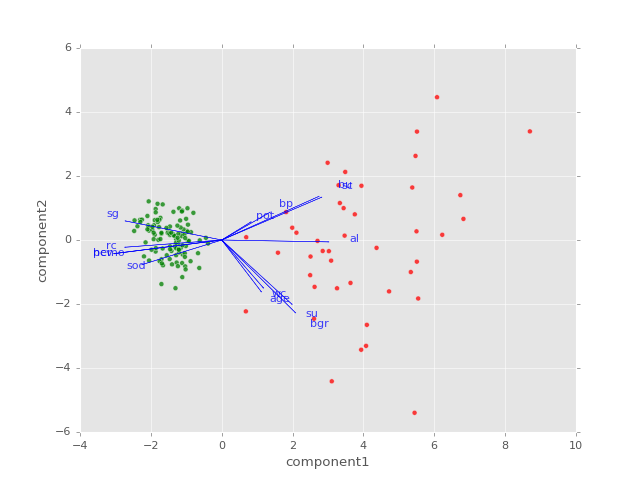

In [51]:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [66]:
# Kidney data 
# assignment 3
df = pd.read_csv('Datasets/kidney_disease.csv')
df.dropna(inplace= True)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [67]:
nominal_feautures = ['id', 'classification']
df.drop(nominal_feautures, axis=1, inplace=True, errors='ignore')

In [68]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,9.5,29,12100,3.7,yes,yes,no,poor,no,yes
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,10.8,32,4500,3.8,yes,yes,no,poor,yes,no
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes


In [69]:
df.pcv = pd.to_numeric(df.pcv , errors='coerce')
df.wc = pd.to_numeric(df.wc , errors='coerce')
df.rc = pd.to_numeric(df.rc , errors='coerce')

In [70]:
df_1 = pd.get_dummies(df)

In [71]:
df_1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [72]:
scaleFeatures = True
df=helper.scaleFeatures(df_1)

New Variances:
 age               1.006369
bp                1.006369
sg                1.006369
al                1.006369
su                1.006369
bgr               1.006369
bu                1.006369
sc                1.006369
sod               1.006369
pot               1.006369
hemo              1.006369
pcv               1.006369
wc                1.006369
rc                1.006369
rbc_abnormal      1.006369
rbc_normal        1.006369
pc_abnormal       1.006369
pc_normal         1.006369
pcc_notpresent    1.006369
pcc_present       1.006369
ba_notpresent     1.006369
ba_present        1.006369
htn_no            1.006369
htn_yes           1.006369
dm_no             1.006369
dm_yes            1.006369
cad_no            1.006369
cad_yes           1.006369
appet_good        1.006369
appet_poor        1.006369
pe_no             1.006369
pe_yes            1.006369
ane_no            1.006369
ane_yes           1.006369
dtype: float64
New Describe:
                 age            bp   

In [73]:
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)

Features by importance:
 [(2.6613378875477682, 'ane_no'), (2.661337887547768, 'ane_yes'), (2.6325256091749254, 'pcv'), (2.6234409708191464, 'hemo'), (2.6078631648975543, 'dm_yes'), (2.6078631648975543, 'dm_no'), (2.602112376141286, 'al'), (2.5809700374666065, 'htn_yes'), (2.5809700374666065, 'htn_no'), (2.4760255495729333, 'pc_normal'), (2.4760255495729324, 'pc_abnormal'), (2.470155689216891, 'bgr'), (2.4209187515422843, 'sc'), (2.3838811035991294, 'bu'), (2.3780220690466995, 'sg'), (2.3696084135207793, 'rc'), (2.3355377505532458, 'appet_poor'), (2.3355377505532453, 'appet_good'), (2.2976485286141957, 'su'), (2.2025449531066212, 'cad_yes'), (2.202544953106621, 'cad_no'), (2.1998269765306495, 'pe_yes'), (2.1998269765306495, 'pe_no'), (2.098452175941398, 'sod'), (1.9218363756374648, 'pcc_present'), (1.9218363756374641, 'pcc_notpresent'), (1.89931298436204, 'rbc_normal'), (1.89931298436204, 'rbc_abnormal'), (1.831035626211942, 'ba_present'), (1.831035626211942, 'ba_notpresent'), (1.175366

<IPython.core.display.Javascript object>


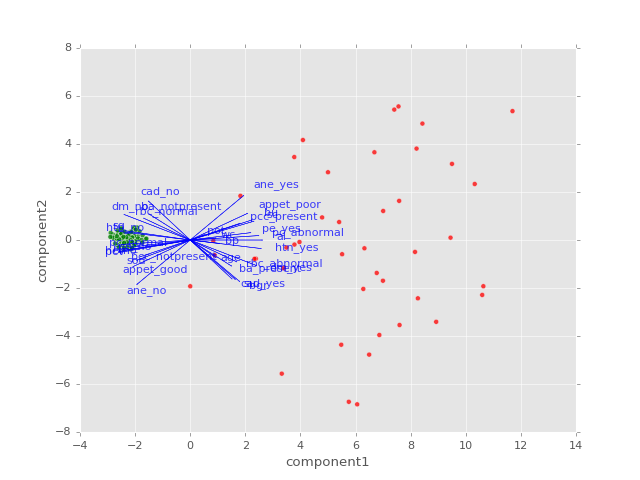

In [74]:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [91]:
pd.DataFrame(pca.components_)
#len(df.columns.values)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.079193,0.088963,-0.200693,0.222495,0.138668,0.152037,0.190970,0.196049,-0.164476,0.042683,...,-0.203874,0.203874,-0.128648,0.128648,-0.176138,0.176138,-0.186294,0.186294,-0.164523,0.164523
1,-0.130028,-0.024795,0.068641,-0.000306,-0.292451,-0.308089,0.149763,0.139622,-0.150694,0.038355,...,0.189806,-0.189806,0.289030,-0.289030,-0.197757,0.197757,-0.054600,0.054600,-0.330361,0.330361


In [92]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)


In [98]:
pca.fit(X)
T = pca.transform(X)

In [103]:
T

array([[-1.38340578,  0.2935787 ],
       [-2.22189802, -0.25133484],
       [-3.6053038 ,  0.04224385],
       [ 1.38340578, -0.2935787 ],
       [ 2.22189802,  0.25133484],
       [ 3.6053038 , -0.04224385]])